# Web Traffic Time Series Forecasting
## Forecast future traffic to Wikipedia pages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../train_1.csv/train_1.csv'

page_access = pd.read_csv(data_path)

In [3]:
page_access.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


# Get page information from the page string

In [4]:
#Split page data
def get_page_info(page):
    underscore_split = page.split("_")
    
    agent = underscore_split[-1]
    access_type = underscore_split[-2]
    pagelang = underscore_split[-3].split(".")[0]
    #pagename = "_".join(underscore_split[:-3])
    
    return pagelang, access_type, agent

#get_page_info(page_access['Page'][50000])

In [5]:
from pandas import Series

pagelangs = []
access_types = []
agents = []

for page in page_access['Page']:
    #Parse page data from page string
    pagelang, access_type, agent = get_page_info(page)
    
    pagelangs.append(pagelang)
    access_types.append(access_type)
    agents.append(agent)
    
#print(pagelangs)
    
page_access['lang'] = Series(pagelangs, index=page_access.index)
page_access['access_type'] = Series(access_types, index=page_access.index)
page_access['agent'] = Series(agents, index=page_access.index)

In [6]:
page_access.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang,access_type,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh,all-access,spider


In [9]:
def reduce_mean(arr):
    return sum(arr) / len(arr)

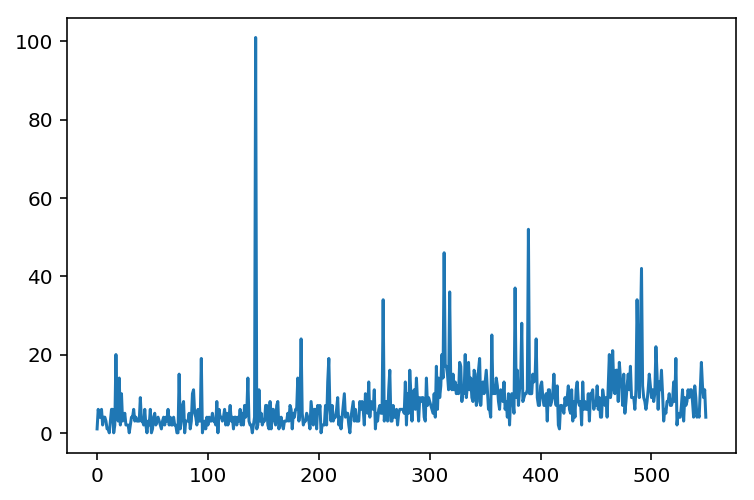

In [12]:
values = page_access.iloc[1000][1:-3].values
mean_values = values / reduce_mean(values)

plt.plot(values)


[]

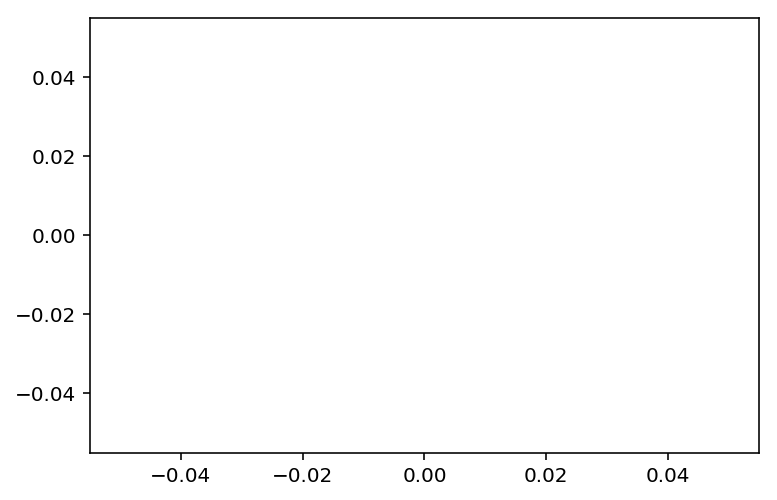

In [66]:
keys = list(page_access)[1:-3]
values = list(page_access.iloc[0][1:-3])
plt.plot(x=keys,y=values)

In [54]:
page_access.iloc[10000][1:-3].keys

<bound method Series.keys of 2015-07-01     757
2015-07-02     905
2015-07-03    1046
2015-07-04     971
2015-07-05    2224
2015-07-06    2050
2015-07-07     655
2015-07-08     522
2015-07-09     357
2015-07-10     238
2015-07-11     206
2015-07-12     190
2015-07-13     343
2015-07-14     268
2015-07-15     314
2015-07-16     173
2015-07-17     139
2015-07-18      94
2015-07-19     102
2015-07-20      72
2015-07-21     105
2015-07-22      93
2015-07-23      75
2015-07-24      70
2015-07-25      57
2015-07-26      66
2015-07-27      65
2015-07-28      72
2015-07-29      78
2015-07-30      49
              ... 
2016-12-02      75
2016-12-03      64
2016-12-04      58
2016-12-05      90
2016-12-06      69
2016-12-07      73
2016-12-08      73
2016-12-09      55
2016-12-10      45
2016-12-11      49
2016-12-12      70
2016-12-13      72
2016-12-14      82
2016-12-15      61
2016-12-16      75
2016-12-17      51
2016-12-18      72
2016-12-19      64
2016-12-20      66
2016-12-21      50
20

# Get weekday from page data

In [88]:
def get_weekday(date_str):
    year, month, day = (int(x) for x in date_str.split('-'))    
    return datetime.date(year, month, day).weekday()

# Create dummy variables

In [86]:
dummy_fields = ['lang','access_type','agent']
for each in dummy_fields:
    dummies = pd.get_dummies(page_access[each], prefix=each, drop_first=False)
    page_access = pd.concat([page_access, dummies], axis=1)

fields_to_drop = ['lang','access_type','agent']
data = page_access.drop(fields_to_drop, axis=1)
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,lang_fr,lang_ja,lang_ru,lang_www,lang_zh,access_type_all-access,access_type_desktop,access_type_mobile-web,agent_all-agents,agent_spider
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,0,0,0,0,1,1,0,0,0,1
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,0,0,0,0,1,1,0,0,0,1
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,0,0,0,0,1,1,0,0,0,1
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,0,0,0,0,1,1,0,0,0,1
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,1


In [87]:
list(page_access)

['Page',
 '2015-07-01',
 '2015-07-02',
 '2015-07-03',
 '2015-07-04',
 '2015-07-05',
 '2015-07-06',
 '2015-07-07',
 '2015-07-08',
 '2015-07-09',
 '2015-07-10',
 '2015-07-11',
 '2015-07-12',
 '2015-07-13',
 '2015-07-14',
 '2015-07-15',
 '2015-07-16',
 '2015-07-17',
 '2015-07-18',
 '2015-07-19',
 '2015-07-20',
 '2015-07-21',
 '2015-07-22',
 '2015-07-23',
 '2015-07-24',
 '2015-07-25',
 '2015-07-26',
 '2015-07-27',
 '2015-07-28',
 '2015-07-29',
 '2015-07-30',
 '2015-07-31',
 '2015-08-01',
 '2015-08-02',
 '2015-08-03',
 '2015-08-04',
 '2015-08-05',
 '2015-08-06',
 '2015-08-07',
 '2015-08-08',
 '2015-08-09',
 '2015-08-10',
 '2015-08-11',
 '2015-08-12',
 '2015-08-13',
 '2015-08-14',
 '2015-08-15',
 '2015-08-16',
 '2015-08-17',
 '2015-08-18',
 '2015-08-19',
 '2015-08-20',
 '2015-08-21',
 '2015-08-22',
 '2015-08-23',
 '2015-08-24',
 '2015-08-25',
 '2015-08-26',
 '2015-08-27',
 '2015-08-28',
 '2015-08-29',
 '2015-08-30',
 '2015-08-31',
 '2015-09-01',
 '2015-09-02',
 '2015-09-03',
 '2015-09-04',
 